<a href="https://colab.research.google.com/github/mnzk/mycolabo/blob/master/tf_tut_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification?hl=ja

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import typing
from typing import Any
import cv2

#print(tf.__version__)

# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['Tシャツ/トップ','パンツ','プルオーバー','ドレス','コート','サンダル','シャツ','スニーカー','バッグ','アンクルブーツ']

class DataSet(typing.NamedTuple):
    train_images: Any
    train_labels: Any
    test_images: Any
    test_labels: Any


def load_data() -> DataSet:
    fashion_mnist = keras.datasets.fashion_mnist
    (img1, label1), (img2, label2) = fashion_mnist.load_data()
    return DataSet(img1, label1, img2, label2)


class NNet:

    def __init__(self):

        self.model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),    #28x28 -> 748
            keras.layers.Dense(128, activation='relu'),   #748 -> 128
            keras.layers.Dense(10, activation='softmax'), #128 -> 10
        ])

        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
    

    def prepare_images(self, images):
        return images / 255

    def train(self):
        ds = load_data()
        print(f"--[TRAIN START]-------------------------")
        self.model.fit(self.prepare_images(ds.train_images), ds.train_labels, epochs=5)
        print(f"--[TRAIN END]-------------------------\n")

    def eval(self):
        ds = load_data()
        print(f"--[EVAL START]-------------------------")
        loss, acc = self.model.evaluate(self.prepare_images(ds.test_images), ds.test_labels, verbose=2)
        print(f"\nTest accuracy: {acc}")
        print(f"--[EVAL END]-------------------------\n")


    def predict(self, target_images):
        return self.model.predict(target_images)


def create_network():
    nn = NNet()
    %time nn.train()
    %time nn.eval()
    return nn
    
nn = create_network()


--[TRAIN START]-------------------------
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4943 - accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3737 - accuracy: 0.8654
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3339 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3116 - accuracy: 0.8857
Epoch 5/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2944 - accuracy: 0.8916
--[TRAIN END]-------------------------

CPU times: user 31.1 s, sys: 1.83 s, total: 32.9 s
Wall time: 25.2 s
--[EVAL START]-------------------------
10000/10000 - 0s - loss: 0.3318 - accuracy: 0.8786

Test accuracy: 0.878600001335144
--[EVAL END]-------------------------

CPU times: user 1.17 s, sys: 55 ms, total: 1.22 s
Wall time: 1.07 s


--[PREDICT START]-------------------------
--[PREDICT END]-------------------------


,actual,expect,actual_name,expect_name,Tシャツ/トップ,パンツ,プルオーバー,ドレス,コート,サンダル,シャツ,スニーカー,バッグ,アンクルブーツ
12,5,7,サンダル,スニーカー,0.000022,4.552277e-06,2.623799e-06,8.732369e-06,5.283232e-06,0.456309,0.000006,3.175469e-01,2.260023e-01,9.291495e-05
23,5,9,サンダル,アンクルブーツ,0.000002,1.060673e-07,3.576504e-08,2.234876e-09,1.246928e-07,0.968894,0.000003,1.412371e-02,7.366449e-05,1.690424e-02
25,2,4,プルオーバー,コート,0.002065,2.132300e-04,5.669531e-01,8.661296e-04,2.814645e-01,0.000021,0.148321,3.125366e-06,9.190515e-05,1.405683e-06
29,6,3,シャツ,ドレス,0.017072,1.283049e-04,1.311346e-02,4.045219e-01,9.131417e-02,0.000024,0.468885,6.634945e-07,4.935693e-03,4.389759e-06
40,0,6,Tシャツ/トップ,シャツ,0.814236,1.310657e-06,3.610828e-03,4.009413e-04,2.044508e-04,0.000006,0.181515,4.501459e-10,2.474599e-05,6.545832e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,3,6,ドレス,シャツ,0.238760,1.789213e-05,2.609392e-04,4.720679e-01,3.890808e-07,0.000027,0.288856,3.380338e-07,1.040746e-06,7.989684e-06
9961,2,6,プルオーバー,シャツ,0.019246,2.648176e-04,8.465685e-01,1.602304e-04,9.224469e-02,0.000233,0.033580,3.825920e-05,7.660412e-03,3.969075e-06
9972,0,2,Tシャツ/トップ,プルオーバー,0.555856,4.886265e-05,1.953536e-01,7.739630e-03,1.350006e-04,0.000029,0.240493,5.539792e-08,3.455921e-04,1.112397e-08
9977,0,6,Tシャツ/トップ,シャツ,0.945565,1.185726e-04,1.948436e-03,1.237641e-04,1.574769e-06,0.000007,0.052235,5.916386e-11,4.919444e-07,5.607944e-08


success rate = 0.8786


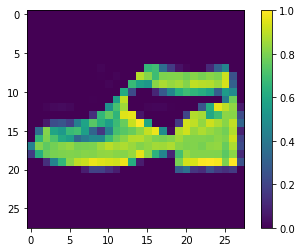

CPU times: user 1.19 s, sys: 46.5 ms, total: 1.23 s
Wall time: 1.11 s


In [0]:
def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

# def check2(images, labels):
#     plt.figure(figsize=(10,10))
#     for i in range(25):
#         plt.subplot(5,5,i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(ds.train_images[i], cmap=plt.cm.binary)
#         plt.xlabel(class_names[ds.train_labels[i]])
#     plt.show()


import pandas as pd

def demo_main():
    global nn

    print(f"--[PREDICT START]-------------------------")
    ds = load_data()
    result = nn.predict(nn.prepare_images(ds.test_images))
    print(f"--[PREDICT END]-------------------------")

    df_result = pd.DataFrame(result)
    col_actual = "actual"
    col_expect = "expect"
    df_result[col_actual] = df_result.idxmax(axis=1)
    df_result[col_expect] = ds.test_labels

    df = df_result

    df_loss = df[df.actual!=df.expect]

    dict_rename = dict(zip(range(len(class_names)), class_names))
    df_loss = df_loss.rename(columns=dict_rename)
    col_actual_name = "actual_name"
    col_expect_name = "expect_name"
    df_loss[col_actual_name] = df_loss.actual.map(lambda a:class_names[a])
    df_loss[col_expect_name] = df_loss.expect.map(lambda a:class_names[a])
    
    new_columns = [*list(df_loss.columns[10:]),
                   *list(df_loss.columns[:10])]
    display(df_loss[new_columns])
    print(f"success rate = {1-len(df_loss)/len(df)}")

    show_image(nn.prepare_images(ds.test_images[23]))


%time demo_main()